<a href="https://colab.research.google.com/github/ShawonSUSTSWE/ML-Lab/blob/main/Final%20Assignments/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
warnings.filterwarnings("ignore")

In [118]:
data = pd.read_csv("/content/bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [119]:
data.shape

(45211, 17)

In [120]:
y = data['y']
x = data.drop("y", axis=1)

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(36168, 16)
(9043, 16)


In [170]:
cat_col = []

for column in x_train.dtypes.index:
  if x_train[column].dtypes == "object":
    cat_col.append(column)

print("Categorical Columns: ", cat_col)

num_col = []

for column in x_train.dtypes.index:
  if x_train[column].dtypes != "object":
    num_col.append(column)

print("Numerical Columns: ", num_col)

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [173]:
def dummify(encoder, x, columns):
    transformed_array = encoder.transform(x)

    enc = encoder.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(cat_col)

    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = num_col + cat_colnames

    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)

    return df

In [174]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)])

encoder = preprocessor.fit(x_train)

In [175]:
x_train = dummify(encoder, x_train, cat_col)
x_test = dummify(encoder, x_test, cat_col)

x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8958,-1.032514,-0.218647,-1.418453,-0.090943,-0.567792,-0.410449,-0.242458,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37703,0.666308,-0.589795,-0.218052,-0.188336,-0.246597,3.134336,0.175283,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16416,-1.410030,-0.346813,0.862309,1.479022,-0.246597,-0.410449,-0.242458,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34780,-0.277482,-0.113844,-1.178373,-0.036403,-0.567792,-0.410449,-0.242458,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11734,0.383171,1.212877,0.502188,-0.819438,-0.567792,-0.410449,-0.242458,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='count'>

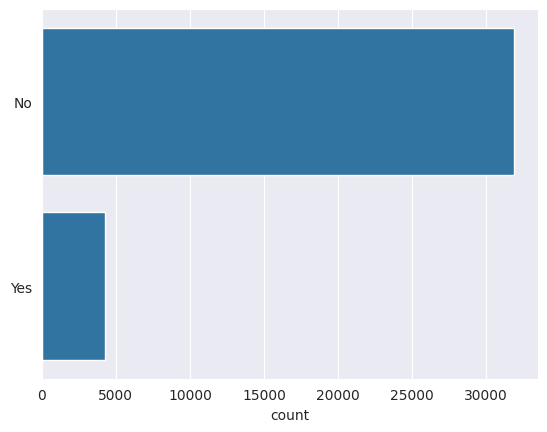

In [176]:
l = []
for i in y_train:
    if(i == "yes"):
        l.append("Yes")
    else:
        l.append("No")
sns.set_style('darkgrid')
sns.countplot(l)

In [177]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("Counter before SMOTE Oversampling: ", counter)

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)
print("Counter after SMOTE Oversampling: ", counter)

Counter before SMOTE Oversampling:  Counter({'no': 31910, 'yes': 4258})
Counter after SMOTE Oversampling:  Counter({'no': 31910, 'yes': 31910})


In [178]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [179]:
logistic_regression = LogisticRegression()

In [180]:
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [181]:
pred = logistic_regression.predict(x_test)

In [182]:
accuracy_score(y_test,pred)

0.8485016034501824

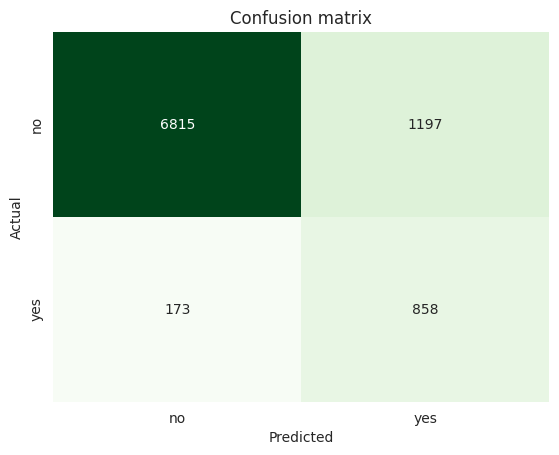

In [183]:
cm=confusion_matrix(y_test,pred)
labels=['no','yes']
plt.title('Confusion matrix')
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Greens)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [184]:
#Calculating Precision, Recall, Accuracy & F1-Score

tn,fp,fn,tp=cm.ravel()
accuracy=(tp+tn)/(tp+tn+fp+fn)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1score=(2*precision*recall/(precision+recall))

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1score)

Accuracy: 84.85016034501824
Precision: 41.75182481751825
Recall: 83.22017458777886
F1 score: 55.60596241088788
